In [1]:
import pandas as pd
import glob
import os
import seaborn as sns
import matplotlib.pyplot as plt

/home/andres/.local/lib/python3.10/site-packages/matplotlib/projections/__init__.py:63: UserWarning: Unable to import Axes3D. This may be due to multiple versions of Matplotlib being installed (e.g. as a system package and as a pip package). As a result, the 3D projection is not available.
  warnings.warn("Unable to import Axes3D. This may be due to multiple versions of "


## Stations

In [2]:
stations = pd.read_csv('./posicion.csv', delimiter=';')
stations.head()

,Codigo,Lat,Long,x,y
0,S01,41.6538,-0.876258,676837.98,4613524.38
1,S02,41.6496,-0.884854,676133.56,4613041.96
2,S03,41.6602,-0.871698,677200.12,4614245.63
3,S04,41.6460,-0.900291,674857.72,4612612.12
4,S05,41.6505,-0.904937,674458.88,4613093.96


In [3]:
stations = stations[['Codigo', 'x', 'y']]
stations.head()

,Codigo,x,y
0,S01,676837.98,4613524.38
1,S02,676133.56,4613041.96
2,S03,677200.12,4614245.63
3,S04,674857.72,4612612.12
4,S05,674458.88,4613093.96


In [4]:
# Change columns name
stations.columns = ['code', 'lat', 'lon']
stations.head()

,code,lat,lon
0,S01,676837.98,4613524.38
1,S02,676133.56,4613041.96
2,S03,677200.12,4614245.63
3,S04,674857.72,4612612.12
4,S05,674458.88,4613093.96


In [5]:
import folium
from pyproj import Transformer

In [6]:
# Transform coordinates from ETRS89 to WRS84
transformer = Transformer.from_crs('EPSG:25830', 'EPSG:4326')

zgz_coords = (41.653858, -0.876258)
map = folium.Map(location=zgz_coords, zoom_start=13)

# Iterate over each station
for index, station in stations.iterrows():
    lat, lon = transformer.transform(station['lat'], station['lon'])

    stations.at[index, 'lat'] = lat
    stations.at[index, 'lon'] = lon
    # Add a marker for the point
    folium.Marker([lat, lon], popup=station['code']).add_to(map)

# If running in a Jupyter Notebook, display the map inline
map

## Temperatures

In [7]:
temperature_files = sorted(glob.glob('./S*ayunt.csv'))
temperature_files

['./S01_CMJ_ayunt.csv',
 './S02_AYT_ayunt.csv',
 './S03_EST_ayunt.csv',
 './S04_IJV_ayunt.csv',
 './S05_DEL_ayunt.csv',
 './S06_IAN_ayunt.csv',
 './S07_PAG_ayunt.csv',
 './S08_ACT_ayunt.csv',
 './S09_FNT_ayunt.csv',
 './S10_AEM_ayunt.csv',
 './S11_BOT_ayunt.csv',
 './S12_OLI_ayunt.csv',
 './S13_CAM_ayunt.csv',
 './S14_VAL_ayunt.csv',
 './S15_POL_ayunt.csv',
 './S16_MOV_ayunt.csv',
 './S17_COG_ayunt.csv',
 './S18_SGR_ayunt.csv',
 './S19_RZD_ayunt.csv',
 './S20_PAT_ayunt.csv',
 './S21_VET_ayunt.csv']

In [8]:
all_dataframes = [pd.read_csv(csv_file, delimiter=',') for csv_file in temperature_files]

# Add a column 'station' with the index of the dataframe
for i, df in enumerate(all_dataframes):
    df['station'] = i+1
    
temperatures = pd.concat(all_dataframes, ignore_index=True)

In [9]:
temperatures.head()

,date,Temp,Hum,station
0,2020-01-01 00:00:00,3.00,84.68,1
1,2020-01-01 01:00:00,3.13,85.13,1
2,2020-01-01 02:00:00,2.48,86.59,1
3,2020-01-01 03:00:00,2.23,87.65,1
4,2020-01-01 04:00:00,1.97,88.40,1


In [10]:
# Split the 'date' column into 'date' and 'time' columns
temperatures[['date', 'time']] = temperatures['date'].str.split(' ', expand=True)
temperatures.head()

,date,Temp,Hum,station,time
0,2020-01-01,3.00,84.68,1,00:00:00
1,2020-01-01,3.13,85.13,1,01:00:00
2,2020-01-01,2.48,86.59,1,02:00:00
3,2020-01-01,2.23,87.65,1,03:00:00
4,2020-01-01,1.97,88.40,1,04:00:00


In [11]:
temperatures = temperatures[temperatures['time'] == '23:00:00']
temperatures.head()

,date,Temp,Hum,station,time
23,2020-01-01,2.70,87.06,1,23:00:00
47,2020-01-02,2.57,84.99,1,23:00:00
71,2020-01-03,6.01,89.84,1,23:00:00
95,2020-01-04,7.33,80.08,1,23:00:00
119,2020-01-05,4.12,89.45,1,23:00:00


In [12]:
dates = [
    "2023-06-02",
    "2023-06-14",
    "2023-06-17",
    "2023-06-22",
    "2023-06-24",
    "2023-06-27",
    "2023-06-29",
    "2023-07-02",
    "2023-07-04",
    "2023-07-09",
    "2023-07-14",
    "2023-07-17",
    "2023-07-19",
    "2023-07-24",
    "2023-07-27",
    "2023-07-29",
    "2023-08-01",
    "2023-08-06",
    "2023-08-08",
    "2023-08-11",
    "2023-08-13",
    "2023-08-16",
    "2023-08-21",
    "2023-08-23"
]

In [13]:
# Filter by date
temperatures = temperatures[temperatures['date'].isin(dates)]
temperatures.head()

,date,Temp,Hum,station,time
29971,2023-06-02,21.88,54.35,1,23:00:00
30259,2023-06-14,20.50,62.96,1,23:00:00
30331,2023-06-17,21.92,78.46,1,23:00:00
30451,2023-06-22,23.12,60.97,1,23:00:00
30499,2023-06-24,28.95,41.83,1,23:00:00


In [14]:
temperatures = temperatures[['date', 'station', 'Temp']]
temperatures.head()

,date,station,Temp
29971,2023-06-02,1,21.88
30259,2023-06-14,1,20.50
30331,2023-06-17,1,21.92
30451,2023-06-22,1,23.12
30499,2023-06-24,1,28.95


In [15]:
# Sort the dataframe by the 'date' column
temperatures = temperatures.sort_values(by=['date', 'station'])

# Reset index
temperatures = temperatures.reset_index(drop=True)

# Change column names
temperatures.columns = ['date', 'station', 'temp']

temperatures.head()

,date,station,temp
0,2023-06-02,1,21.880
1,2023-06-02,2,20.890
2,2023-06-02,3,20.680
3,2023-06-02,4,21.008
4,2023-06-02,5,21.360


### Compute average first and then the differences respect to station 19

In [16]:
'''# Compute average temperature for each station
temperatures = temperatures.groupby('station')['temp'].mean().reset_index()

# Get the average temperature of station 19
station_19_avg = temperatures[temperatures['station'] == 19]['temp'].values[0]

# Compute the difference with respect to station 19
temperatures['diff_from_19'] = station_19_avg - temperatures['temp']

temperatures'''

"# Compute average temperature for each station\ntemperatures = temperatures.groupby('station')['temp'].mean().reset_index()\n\n# Get the average temperature of station 19\nstation_19_avg = temperatures[temperatures['station'] == 19]['temp'].values[0]\n\n# Compute the difference with respect to station 19\ntemperatures['diff_from_19'] = station_19_avg - temperatures['temp']\n\ntemperatures"

### For each day compute difference between each station and station 21, and then compute average temperature value for each station

In [17]:
# Merge the dataframe with itself to compute the difference with station 19
df_ref = temperatures[temperatures['station'] == 19][['date', 'temp']].rename(columns={'temp': 'temp_ref'})
df_merged = pd.merge(temperatures, df_ref, on='date')
df_merged

,date,station,temp,temp_ref
0,2023-06-02,1,21.880,19.698
1,2023-06-02,2,20.890,19.698
2,2023-06-02,3,20.680,19.698
3,2023-06-02,4,21.008,19.698
4,2023-06-02,5,21.360,19.698
...,...,...,...,...
499,2023-08-23,17,31.459,29.365
500,2023-08-23,18,31.408,29.365
501,2023-08-23,19,29.365,29.365
502,2023-08-23,20,29.980,29.365


In [18]:
# Compute the daily temperature difference from station 19 for each station
df_merged['temp_diff'] = df_merged['temp'] - df_merged['temp_ref']
df_merged

,date,station,temp,temp_ref,temp_diff
0,2023-06-02,1,21.880,19.698,2.182
1,2023-06-02,2,20.890,19.698,1.192
2,2023-06-02,3,20.680,19.698,0.982
3,2023-06-02,4,21.008,19.698,1.310
4,2023-06-02,5,21.360,19.698,1.662
...,...,...,...,...,...
499,2023-08-23,17,31.459,29.365,2.094
500,2023-08-23,18,31.408,29.365,2.043
501,2023-08-23,19,29.365,29.365,0.000
502,2023-08-23,20,29.980,29.365,0.615


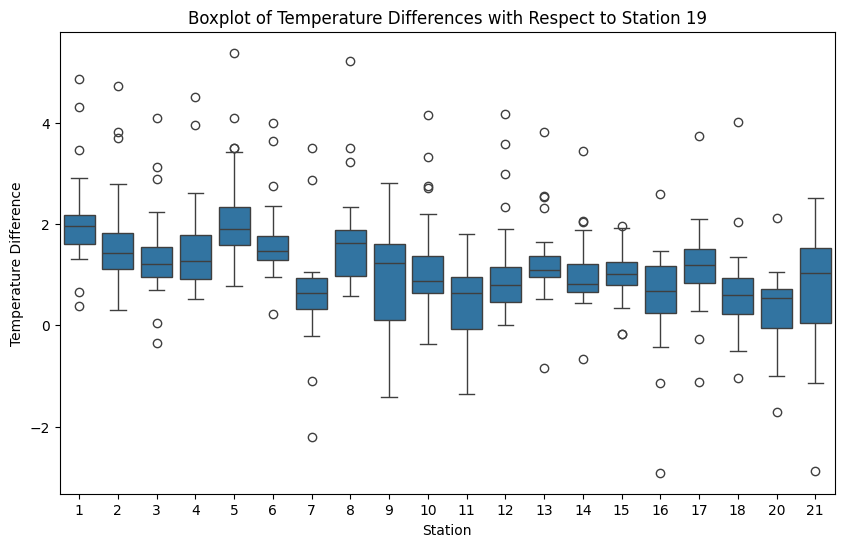

In [19]:
df_filtered = df_merged[df_merged['station'] != 19]

# Create a boxplot for each station showing the temperature differences
plt.figure(figsize=(10, 6))
sns.boxplot(x='station', y='temp_diff', data=df_filtered)

plt.title('Boxplot of Temperature Differences with Respect to Station 19')
plt.xlabel('Station')
plt.ylabel('Temperature Difference')

plt.show()

In [20]:
df_filtered = df_filtered.groupby('station')['temp_diff'].mean().reset_index()
df_filtered

,station,temp_diff
0,1,2.095816
1,2,1.704150
2,3,1.414150
3,4,1.569858
4,5,2.212483
5,6,1.678233
6,7,0.626900
7,8,1.707733
8,9,0.895400
9,10,1.219983


In [21]:
stations.head()

,code,lat,lon
0,S01,41.653858,-0.876258
1,S02,41.649671,-0.884855
2,S03,41.660269,-0.871698
3,S04,41.646083,-0.900292
4,S05,41.650508,-0.904937


In [22]:
# Remove 'S' and convert the remaining part to integer
stations['code'] = stations['code'].apply(lambda x: int(x[1:]))
stations.head()

,code,lat,lon
0,1,41.653858,-0.876258
1,2,41.649671,-0.884855
2,3,41.660269,-0.871698
3,4,41.646083,-0.900292
4,5,41.650508,-0.904937


In [23]:
data = pd.merge(df_filtered, stations, left_on='station', right_on='code')
data.head()

,station,temp_diff,code,lat,lon
0,1,2.095816,1,41.653858,-0.876258
1,2,1.704150,2,41.649671,-0.884855
2,3,1.414150,3,41.660269,-0.871698
3,4,1.569858,4,41.646083,-0.900292
4,5,2.212483,5,41.650508,-0.904937


In [24]:
data = data.drop(columns=['code'])
data.head()

,station,temp_diff,lat,lon
0,1,2.095816,41.653858,-0.876258
1,2,1.704150,41.649671,-0.884855
2,3,1.414150,41.660269,-0.871698
3,4,1.569858,41.646083,-0.900292
4,5,2.212483,41.650508,-0.904937


In [25]:
data.to_csv('diff.csv', index=False)

## Generate shapefile

In [26]:
import geopandas as gpd
from shapely.geometry import Point

In [27]:
# Create a GeoDataFrame
geometry = [Point(xy) for xy in zip(data['lon'], data['lat'])]
gdf = gpd.GeoDataFrame(data, geometry=geometry)

# Set CRS and save
filename = 'temp_diff_for_each_station.shp'
gdf.set_crs(epsg=4326, inplace=True)
gdf = gdf.to_crs('EPSG:23029')
gdf.to_file(filename)

In [28]:
gdf.crs

<Projected CRS: EPSG:23029>
Name: ED50 / UTM zone 29N
Axis Info [cartesian]:
- E[east]: Easting (metre)
- N[north]: Northing (metre)
Area of Use:
- name: Europe - between 12°W and 6°W - Faroe Islands - onshore; Spain - mainland onshore; Ireland offshore.
- bounds: (-12.0, 36.13, -6.0, 62.41)
Coordinate Operation:
- name: UTM zone 29N
- method: Transverse Mercator
Datum: European Datum 1950
- Ellipsoid: International 1924
- Prime Meridian: Greenwich